<a href="https://colab.research.google.com/github/Hegazian/Deep_Learning/blob/master/Traffic_signs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://bitbucket.org/jadslim/german-traffic-signs'

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
import random
import pickle
import pandas as pd


In [4]:
np.random.seed(0)

In [5]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

<class 'dict'>


In [6]:
x_train , y_train = train_data['features'] , train_data['labels']
x_test , y_test = test_data['features'] , test_data['labels']
x_val , y_val = val_data['features'] , val_data['labels']

In [7]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [8]:
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(x_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 28 x 28."
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(x_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 28 x 28."
assert(x_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(x_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 28 x 28."

In [9]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

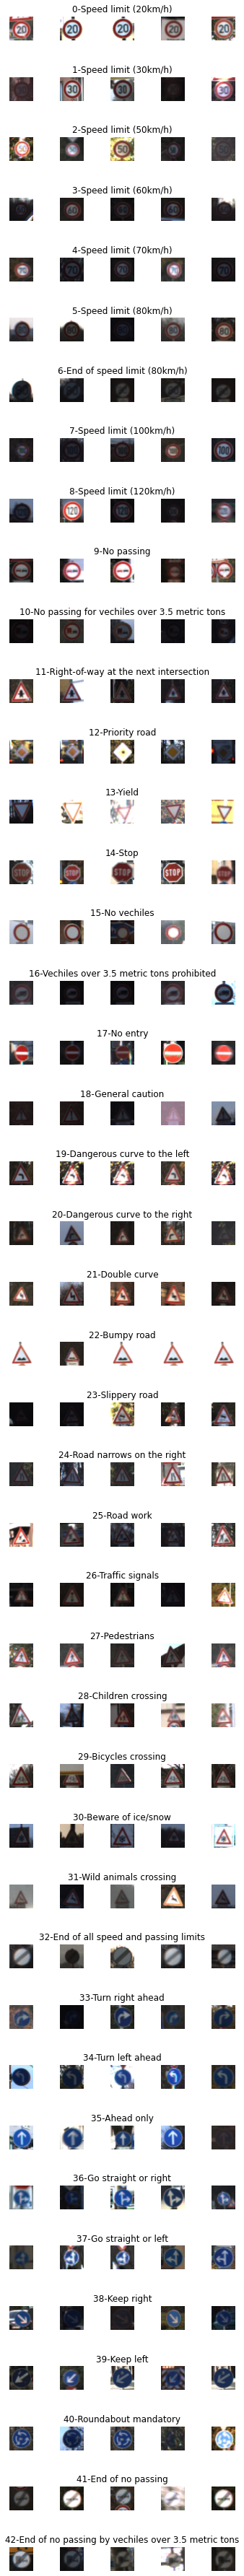

In [10]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j , row in data.iterrows():
      x_selected = x_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + "-" + row["SignName"])
        num_of_samples.append(len(x_selected))

(32, 32, 3) 31


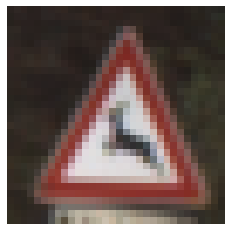

In [11]:
import cv2

plt.imshow(x_train[500])
plt.axis("off")
print(x_train[500].shape , y_train[500])

(32, 32) 31


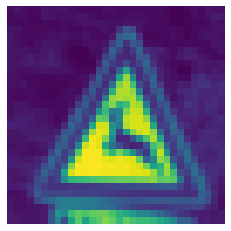

In [12]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


image = grayscale(x_train[500])
plt.imshow(image)
plt.axis("off")
print(image.shape , y_train[500])

(32, 32) 31


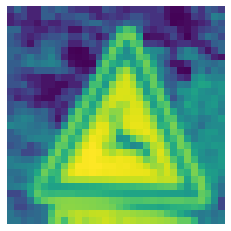

In [13]:
def equalize(image):
  img = cv2.equalizeHist(image)
  return img

equalize_image = equalize(image)
plt.imshow(equalize_image)
plt.axis("off")
print(equalize_image.shape , y_train[500])


In [14]:
def preprocssing(image):
  image = grayscale(image)
  image = equalize(image)
  image = image/255
  return image
x_train = np.array(list(map(preprocssing,x_train)))
x_test = np.array(list(map(preprocssing,x_test)))
x_val = np.array(list(map(preprocssing,x_val)))

(34799, 32, 32)


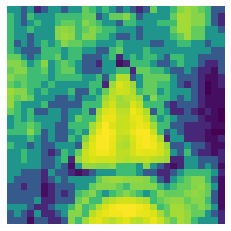

In [15]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)])
plt.axis('off')
print(x_train.shape)

In [16]:
x_train = x_train.reshape(34799,32,32,1)
x_test = x_test.reshape(12630,32,32,1)
x_val = x_val.reshape(4410,32,32,1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
data_generator = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    rotation_range=10)
data_generator.fit(x_train)

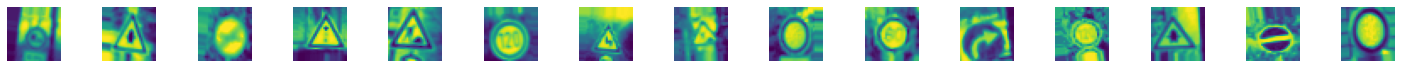

In [19]:
batches = data_generator.flow(x_train,y_train,batch_size=20)
x_batch , y_batch = next(batches)

fig , axis = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axis[i].imshow(x_batch[i].reshape(32,32))
  axis[i].axis('off')

In [20]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_val = to_categorical(y_val,num_classes)

In [28]:
def LeNet():
  model = Sequential()

  model.add(Conv2D(filters=60,kernel_size=(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(filters=60,kernel_size=(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=30,kernel_size=(3,3),activation='relu'))
  model.add(Conv2D(filters=30,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
  return model



In [29]:
model = LeNet()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [30]:
h = model.fit_generator(data_generator.flow(x_train, y_train, batch_size=50),steps_per_epoch=x_train.shape[0]/50,epochs=15,
                        validation_data=(x_val, y_val), shuffle = 1)


Epoch 1/15
696/695 [==============================] - 12s 17ms/step - loss: 1.7741 - accuracy: 0.4976 - val_loss: 0.2807 - val_accuracy: 0.9224
Epoch 2/15
696/695 [==============================] - 12s 18ms/step - loss: 0.5370 - accuracy: 0.8334 - val_loss: 0.1420 - val_accuracy: 0.9590
Epoch 3/15
696/695 [==============================] - 12s 17ms/step - loss: 0.3214 - accuracy: 0.8991 - val_loss: 0.0689 - val_accuracy: 0.9816
Epoch 4/15
696/695 [==============================] - 12s 17ms/step - loss: 0.2374 - accuracy: 0.9272 - val_loss: 0.0753 - val_accuracy: 0.9766
Epoch 5/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1933 - accuracy: 0.9395 - val_loss: 0.0752 - val_accuracy: 0.9760
Epoch 6/15
696/695 [==============================] - 12s 17ms/step - loss: 0.1683 - accuracy: 0.9473 - val_loss: 0.0551 - val_accuracy: 0.9853
Epoch 7/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1517 - accuracy: 0.9532 - val_loss: 0.0428 - val_accuracy:

Text(0.5, 0, 'epoches')

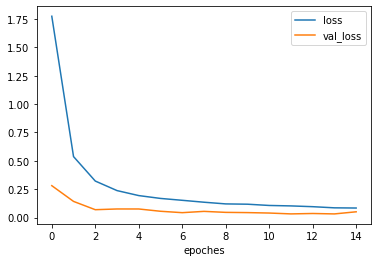

In [31]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.xlabel("epoches")

Text(0.5, 0, 'epoches')

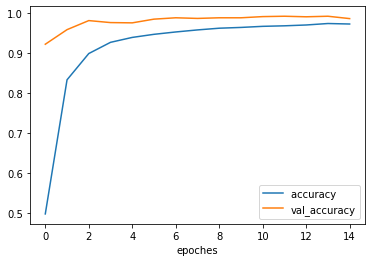

In [32]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy ', 'val_accuracy'])
plt.xlabel("epoches")

In [33]:
score = model.evaluate(x_test,y_test,verbose=0)
print("test score:",score[0])
print("test accuracy:", score[1])

test score: 0.1647106260061264
test accuracy: 0.9634204506874084


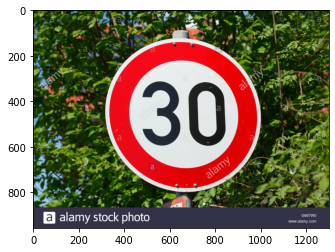

In [56]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
url1 = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
url2 = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
url3= 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
url4= 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


(32, 32)


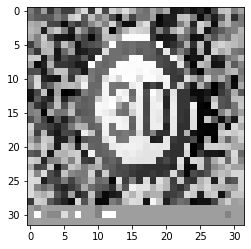

In [57]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocssing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [58]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]
